# 100跳和按照10跳划分子域的结果。

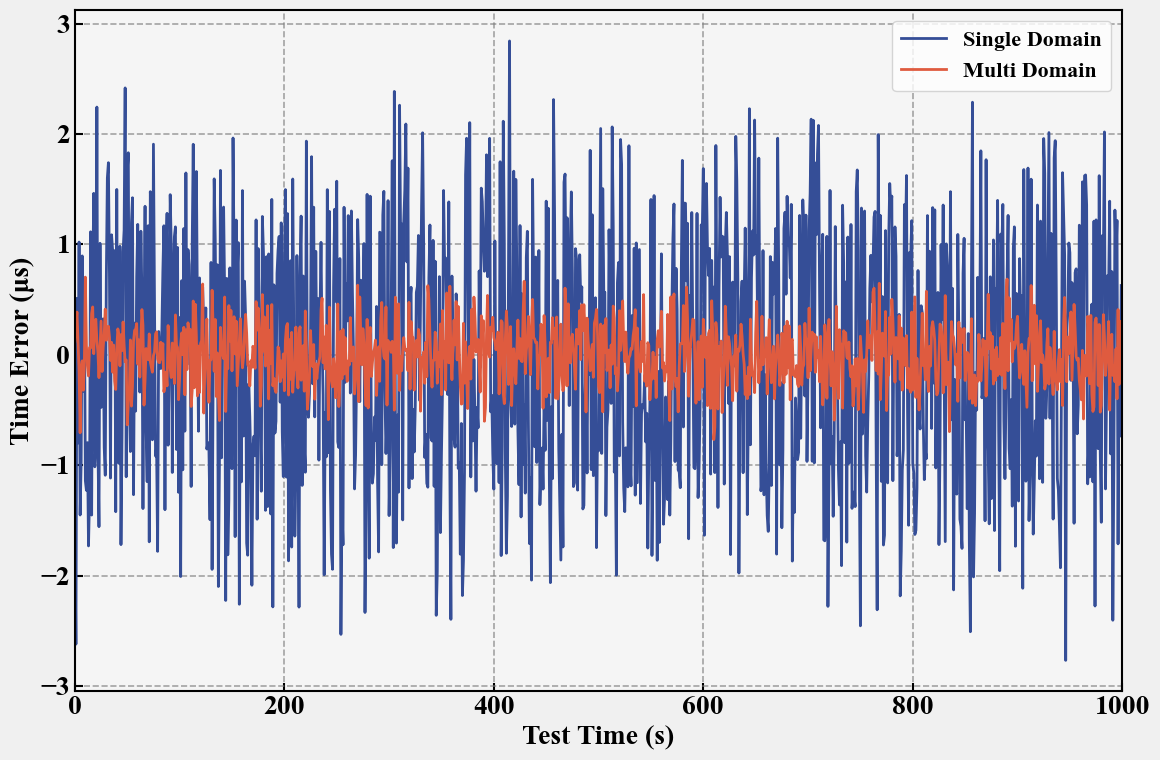

图像已成功生成并保存在output_image文件夹中。


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.font_manager import FontProperties

# 设置全局字体
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20
plt.rcParams['font.weight'] = 'bold'

# 设置颜色
colors = ['#354e97', '#df5b3f', '#f5b46f']

# 创建输出目录（如果不存在）
output_dir = 'output_image'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 1. 读取第一个CSV文件的数据
file_path1 = r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250415\output_data\single_domain_data_v2.csv"
df1 = pd.read_csv(file_path1)

# 获取第100列(索引为99)的数据，注意跳过标题行
col_name1 = df1.columns[99]  # 获取列名
data1 = df1[col_name1].values  # 获取该列所有数据

# 将数据从秒转换为微秒
data1_us = data1 * 1e6  # 秒转换为微秒

# 2. 读取第二个CSV文件的数据
file_path2 = r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250415\output_data\multi_domain_data_v2.csv"
df2 = pd.read_csv(file_path2)

# 获取第100列的数据
col_name2 = df2.columns[99]  # 获取列名
data2 = df2[col_name2].values  # 获取该列所有数据

# 将数据从秒转换为微秒
data2_us = data2 * 1e6  # 秒转换为微秒

# 3. 创建x轴数据（从0开始）
x1 = np.arange(len(data1_us))
x2 = np.arange(len(data2_us))

# 4. 绘制折线图
fig, ax = plt.subplots(figsize=(12, 8))

# 设置图表背景色为浅灰色
fig.patch.set_facecolor('#f0f0f0')  # 设置图形背景
ax.set_facecolor('#f5f5f5')  # 设置坐标轴背景

# 绘制第一组数据
ax.plot(x1, data1_us, color=colors[0], linewidth=2, label='Single Domain')

# 绘制第二组数据
ax.plot(x2, data2_us, color=colors[1], linewidth=2, label='Multi Domain')

# 设置坐标轴颜色和宽度，确保它们可见
ax.spines['bottom'].set_color('black')  # x轴颜色
ax.spines['left'].set_color('black')    # y轴颜色
ax.spines['bottom'].set_linewidth(1.5)  # x轴线宽
ax.spines['left'].set_linewidth(1.5)    # y轴线宽

# 确保右侧和顶部边框也可见
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)

# 设置刻度向内
ax.tick_params(direction='in', width=1.5, length=6, colors='black')

# 设置x轴从0开始
ax.set_xlim(left=0,right=1000)  # 确保x轴从0开始

# 设置网格线，使用深色并增加线宽以确保可见性
ax.grid(True, linestyle='--', linewidth=1.2, color='gray', alpha=0.7, zorder=0)

# 设置图表标题和标签
ax.set_xlabel('Test Time (s)', fontweight='bold')
ax.set_ylabel('Time Error (μs)', fontweight='bold')

# 添加图例
ax.legend(fontsize=16)

# 调整布局
plt.tight_layout()

# 5. 保存图片（600 DPI）
plt.savefig(os.path.join(output_dir, 'time_error_comparison.png'), dpi=600, bbox_inches='tight')

# 6. 显示图片
plt.show()

print("图像已成功生成并保存在output_image文件夹中。")